# Problem Set 4: Networks

In this problem set we are going to be working with network-like data. We will be using a smaller dataset obtained from foursquare's API in Riyadh. The dataset was constructed by scrapping an API endpoint that given a venue, it lists the next top 5 venues where users usually check-in afterwards. All the data is aggregated, and the specifics of each trip, or check-in sequence are not available. However, it can provide a good overview of some general dynamics around the city. 

In the dataset, every node of venue, is connected to at least other node or venue. More popular nodes will be connected to more nodes, or will have more edges attached to them. Additionally, by constructing a network with the data, we can analyze some other interesting properties that might give us some insights of the urban dynamics of the region.

1. Constructing a network with the dataset.
2. Assigning spatial properties to the network.
3. Analyzing some basic network properties.
4. Constructing exploratory visualizations that help us make sense out of our analysis and dataset.

In [1]:
# Import some libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# This allows plots to appear on the IPython notebook.
%matplotlib inline 

The data is contained in two different `CSV` files: `FoursqureLinksNetwork.csv` and `FoursqureCheckinNodes.csv`. First, we will import the CSV containing all the edges among **Foursquare** venues, and construct a `networkx` network. In this case, the node index or name will be the venue ID.

In [2]:
# Use pandas to import the csv
df_edges = pd.read_csv('data/FoursqureLinksNetwork.csv', sep=",")
df_edges.head(10)

,FROM-ID,TO-ID,DISTANCE
0,4f3381cae4b0befff0254890,4d90bb7ffa9437048ca338c6,0.050111
1,4f3381cae4b0befff0254890,50e4021b582f294b85631919,0.083781
2,4f3381cae4b0befff0254890,4e341a00e4cdf7a42cad9421,0.046179
3,4f3381cae4b0befff0254890,50433012e4b05698baa75339,0.057012
4,4f3381cae4b0befff0254890,4f8f03f5e4b09b4d92853b2c,0.029747
5,4dd6ae1afa76ad96d111ee3f,4bb60acd46d4a5932198c5c0,0.103810
6,4dd6ae1afa76ad96d111ee3f,4c72bb9a4bc4236ae30ccc7a,0.072773
7,4dd6ae1afa76ad96d111ee3f,4bacf76cf964a5201c1f3be3,0.211676
8,4dd6ae1afa76ad96d111ee3f,50295233e4b0db2acbb75c69,0.121546
9,4dd6ae1afa76ad96d111ee3f,523b3ba2498e256cb4ca2b15,0.079895


Next, we will import the CSV containing all the nodes representing **Foursquare** venues.

In [3]:
df_nodes = pd.read_csv('data/FoursqureCheckinNodes.csv', sep=",")
df_nodes.head(10)

,ID,NAME,CATEGORY,CHECK-IN,LAT,LONG
0,558e5ce5498e164a5cb27afc,�����_�� �_�������� ���_���� - King Khalid Air...,Airport Terminal,21,24.760483,46.705338
1,4ccd23f1c0378cfa93b68b48,Princess Nora University,College Academic Building,532,24.774344,46.728845
2,4da5ec8a4b2280544b678da0,Lulu Hypermarket | �������� ���_�_�������_������,Department Store,6453,24.663989,46.703757
3,50295233e4b0db2acbb75c69,Papparoti | ���_���_�����ș_,Coffee Shop,2168,24.693468,46.669636
4,4da5ec8a4b2280544b678da0,Avenue Mall,Department Store,1474,24.663569,46.703937
5,4da5ec8a4b2280544b678da0,New Cabalen,Department Store,216,24.663668,46.703467
6,4da5ec8a4b2280544b678da0,Darbar Indian Cuisine | �����_�� ���_�����_���...,Department Store,170,24.663485,46.703861
7,4da5ec8a4b2280544b678da0,Baskin Robbins,Department Store,74,24.663722,46.703734
8,50e1f196e4b0748c84074466,Food Court - Avenue Mall,Diner,57,24.663442,46.703592
9,5318e95f498eaff004e39f6c,Candylawa | ���_�����_���_����,Candy Store,2292,24.691785,46.669735


## Part 1

Now, using your recently acquired **Pandas** knowledge, use **Pandas'** `.join` or `.merge` functions, to match the index of the origin id with its latitude and longitude (we want to add new columns with the lat and lon values for a given node). Create a new dataframe with the df_edge (including from-id, to-id, and distance columns) and add a **lat_to and lon_to** column to the datafram containing this information. Do the same with the destination id, but name the respective columns **lat_from and lon_from**.

**Deliverable**
* A pandas Dataframe with 4 new columns: the columns should correspond to the lat and lon of the **FROM-ID** and **TO-ID** columns.

In [4]:
# Merge the origin locations
edge_locs = pd.merge(df_edges, df_nodes[['ID','LAT','LONG']], how='inner', left_on='FROM-ID', right_on='ID')
edge_locs.rename(columns={'LAT':'LAT_FROM','LONG':'LONG_FROM'}, inplace=True)
# edge_locs.head(20)

# Merge the destination locations
edge_locs = pd.merge(edge_locs, df_nodes[['ID','LAT','LONG']], how='inner', left_on='TO-ID', right_on='ID')
edge_locs.rename(columns={'LAT':'LAT_TO','LONG':'LONG_TO'}, inplace=True)
edge_locs.drop(['ID_x','ID_y'], inplace=True, axis=1)
print len(df_edges)
print len(edge_locs)
# Only about a third of the edges were matched with node information at both ends

edge_locs.head(20)

1578
537


,FROM-ID,TO-ID,DISTANCE,LAT_FROM,LONG_FROM,LAT_TO,LONG_TO
0,50295233e4b0db2acbb75c69,4f1d62b0e4b03543a3409cd2,0.129974,24.693468,46.669636,24.691873,46.668853
1,4fcf729ae4b07997d3141487,4f1d62b0e4b03543a3409cd2,0.017338,24.692186,46.670004,24.691873,46.668853
2,4fcf729ae4b07997d3141487,4f1d62b0e4b03543a3409cd2,0.017338,24.692337,46.669961,24.691873,46.668853
3,5318e95f498eaff004e39f6c,533687b3498ec0c5b90ff33b,0.030966,24.691785,46.669735,24.691514,46.669664
4,5318e95f498eaff004e39f6c,533687b3498ec0c5b90ff33b,0.030966,24.691748,46.669056,24.691514,46.669664
5,4f1d62b0e4b03543a3409cd2,4fcf729ae4b07997d3141487,0.017338,24.691873,46.668853,24.692186,46.670004
6,4f1d62b0e4b03543a3409cd2,4fcf729ae4b07997d3141487,0.017338,24.691873,46.668853,24.692337,46.669961
7,4d4c01cfe4fd6ea8f7e8be61,4c601b8490b2c9b6d7013c22,0.058323,24.691474,46.670711,24.692466,46.671305
8,4d4c01cfe4fd6ea8f7e8be61,4c601b8490b2c9b6d7013c22,0.058323,24.691474,46.670711,24.692087,46.671357
9,4d4c01cfe4fd6ea8f7e8be61,4c601b8490b2c9b6d7013c22,0.058323,24.691474,46.670711,24.693912,46.670527


In [6]:
# There were some duplicate IDs in the nodes table, which then duplicated any edges connected to them.

edge_locs_clean = edge_locs.drop_duplicates(subset=['FROM-ID','TO-ID'])
print len(edge_locs_clean)
edge_locs_clean.head(20)

# The operation has thrown out all but one of each duplicated pair of IDs. The lats and longs are close enough
# that it doesn't matter too much which one we keep.
# The remaining data is now clean and unambiguous, albeit at a cost of losing nearly 90% of the total.


170


,FROM-ID,TO-ID,DISTANCE,LAT_FROM,LONG_FROM,LAT_TO,LONG_TO
0,50295233e4b0db2acbb75c69,4f1d62b0e4b03543a3409cd2,0.129974,24.693468,46.669636,24.691873,46.668853
1,4fcf729ae4b07997d3141487,4f1d62b0e4b03543a3409cd2,0.017338,24.692186,46.670004,24.691873,46.668853
3,5318e95f498eaff004e39f6c,533687b3498ec0c5b90ff33b,0.030966,24.691785,46.669735,24.691514,46.669664
5,4f1d62b0e4b03543a3409cd2,4fcf729ae4b07997d3141487,0.017338,24.691873,46.668853,24.692186,46.670004
7,4d4c01cfe4fd6ea8f7e8be61,4c601b8490b2c9b6d7013c22,0.058323,24.691474,46.670711,24.692466,46.671305
17,4d4c01cfe4fd6ea8f7e8be61,504c55e7e4b04421f3310d34,0.798932,24.691474,46.670711,24.694169,46.678723
19,4cab502436fa6dcbd0e5d778,4c4c19985609c9b6dbac0992,0.066359,24.697875,46.683698,24.697406,46.683302
22,4c4c19985609c9b6dbac0992,4cab502436fa6dcbd0e5d778,0.066359,24.697406,46.683302,24.697875,46.683698
25,4be70e16cf200f47b634153c,4d2146a4d7b0b1f77cf71b9f,0.154500,24.675851,46.676195,24.676095,46.675591
28,52c11e7a11d21c6e7f7c0e7b,541ff49b498e451a8f1a7164,0.006980,24.711734,46.675488,24.711783,46.675530


## Part 2

Now, that we have an appropriate data structure, we will be creating a `networkx` network.

In [7]:
# Let's define an empty undirected graph.
RG = nx.Graph()

Now let's use the `df_nodes` to add nodes to our newly created graph. The node index or name will be the **ID** column of the dataframe. Make sure to add the rest of the dataframe columns to the node as properties.

`Hint: You can loop through all the rows, and use each one of their values to add a node and define specific properties. The property name should be the same as the column name.`

**Deliverable**
* You should populate the **RG** network with all the nodes part of the `df_nodes` dataframe. All the nodes should also have the additional columns as a node property. To show that you correctly populated the network, print out the **node names**, and the **number of nodes**.

In [8]:
# Add nodes to the graph here

nkeys = ['NAME','CATEGORY','CHECK-IN','LAT','LONG']

for row in df_nodes.itertuples(index=False):
    values = row[1:]
    node_dict = dict(zip(nkeys, values))    
    RG.add_node(row[0], node_attrs=node_dict);

print RG.number_of_nodes()

# The network automatically rejected duplicate nodes

print RG.nodes()


275
['5193a1ad498eb76c92f3fb9d', '51081ee0e4b093dcac39e0ec', '547e1a04498e3f5770351032', '4c84299051ada1cdb8ca2c10', '54441e14498ec84e43188646', '4ea9bbd302d52c460a8980d5', '530b9841498e9d01f354d57c', '4eff5130b8f787cad09ace8d', '4f561bcae4b0d0433013e4ee', '4d2146a4d7b0b1f77cf71b9f', '4d98c87b744f3704d7dff757', '5257253411d294223f9f3688', '533687b3498ec0c5b90ff33b', '4f3a9c99e4b0928989480081', '4f1d62b0e4b03543a3409cd2', '4db3038a43a1369cb5989f18', '50b08d04e4b045752b6cda32', '4efef727490182a1a6d3887b', '4b9948a2f964a520097035e3', '4e7c9e0a88777c30772abe29', '4d4be007f523a143698f6f9d', '4b781727f964a52058b52ee3', '50ddf988e4b0a2f2fe7b2a37', '52c44ed2498e2ff9cc1d2355', '4f817c97e4b0c7b85619c02f', '4b897856f964a520503932e3', '4ff80f35e4b058e1656d0444', '52effe1e498e631c290b8416', '4f6cadffe4b032eb625233d5', '4b7c4529f964a5209f882fe3', '4c3f278f51dee21ed792eb6e', '5197bf24498ec577cf5bb723', '5318e95f498eaff004e39f6c', '536b5ae7498e047e33524612', '5392bba3498ee0e5e0b5258f', '4eee25c57ee5f4

Now let's use the new joined dataframe you just made in part 1, to add edges to our graph. The edge index is the **Row Number** of the dataframe. Make sure to add the rest of the dataframe columns to the node as properties (such as lat_from, lon_from, lat_to, and lon_to).

`Hint: You can loop through all the rows of the dataframe, and use each one of edge to and from ID values to add an edge and define specific properties. The property name should be the same as the column name.`

```Python 
# To add properties to a node you can simply do:
G.add_node(node_id, node_property_n="this node's property N")
```

**Deliverable**
* You should populate the **RG** network with all the edges part of the `df_edges` dataframe. All the edges should also have the additional columns as a node property (in this case just the distance column). To show that you correctly populated the network, print out the **edges**, and the **number of edges**.

In [9]:
# Add edges to the graph here

ekeys = 'DISTANCE'
i=0
for row in edge_locs_clean.itertuples(index=False):
    values = row[2]
    edge_dict = {ekeys:values}
    RG.add_edge(row[0], row[1], edge_attrs=edge_dict)
    i+=1;
    
print i
print RG.number_of_edges()
# i =! number of edges. The network appears to be rejecting some edges. Unclear why, since dupes were already removed

print RG.edges()

170
139
[('5193a1ad498eb76c92f3fb9d', '4bb78b8f3db7b7139222209a'), ('51081ee0e4b093dcac39e0ec', '52efd23b11d2203926fb13d2'), ('51081ee0e4b093dcac39e0ec', '4ff8433ee4b002d4d3d4992c'), ('4c84299051ada1cdb8ca2c10', '4b897856f964a520503932e3'), ('4ea9bbd302d52c460a8980d5', '5042691be4b055ecd356a70e'), ('4f561bcae4b0d0433013e4ee', '4c192a06d4d9c928c28df029'), ('4f561bcae4b0d0433013e4ee', '5012fb8de4b0f8ec77f1da9d'), ('4d2146a4d7b0b1f77cf71b9f', '4be70e16cf200f47b634153c'), ('4d98c87b744f3704d7dff757', '5392bba3498ee0e5e0b5258f'), ('5257253411d294223f9f3688', '4b65bb89f964a52059fc2ae3'), ('533687b3498ec0c5b90ff33b', '5318e95f498eaff004e39f6c'), ('4f1d62b0e4b03543a3409cd2', '4fcf729ae4b07997d3141487'), ('4f1d62b0e4b03543a3409cd2', '50295233e4b0db2acbb75c69'), ('50b08d04e4b045752b6cda32', '541ff49b498e451a8f1a7164'), ('50b08d04e4b045752b6cda32', '4c892e4897828cfa5630a2aa'), ('50b08d04e4b045752b6cda32', '4e5bcac318388cd5cbc1a9c5'), ('4efef727490182a1a6d3887b', '4d8b488cbc848cfacb8bec2b'), ('4b9

Now that we have a populated network, let's plot it! We will use networkx's `draw()` functions.

**Deliverable**
* You should create a plot of the network. The position of every node (`pos`) should be defined by the lat and lon of the given node. The **color** and **size** of the nodes should be dependent on one of the node properties.

In [10]:
# Make a dictionary of positions
P={}
for node_id in RG.nodes():
    PLat = RG.node[node_id]['node_attrs']['LAT']
    PLong = RG.node[node_id]['node_attrs']['LONG']
    P[node_id] = [PLat,PLong];
    

In [30]:
# Set up the node sizes. Degree probably makes the most sense, so important nodes stand out.
degrees = nx.degree(RG)
node_sizes = [(v * 50)+10 for v in degrees.values()]

# Base the colors on an attribute. Check-in number, why not.
node_colors = []
for node_id in RG.nodes():
    node_colors.append(RG.node[node_id]['node_attrs']['CHECK-IN']);


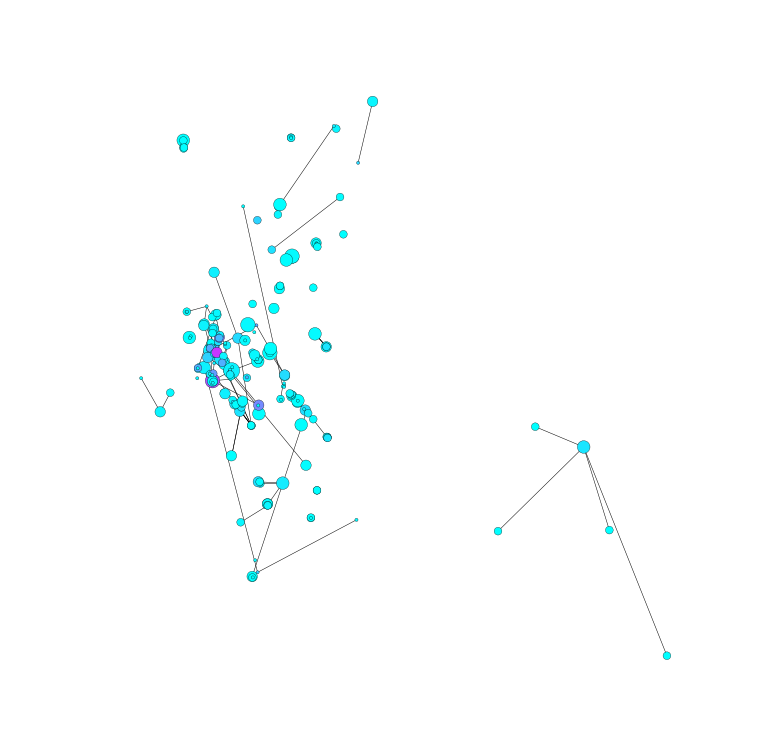

In [31]:
# Finally, make the plot.

my_cmap = plt.cm.get_cmap('cool')

plt.figure(figsize=(10,10))
nx.draw(RG, pos=P, node_size=node_sizes, width=.5, node_color=node_colors, cmap=my_cmap);

# Not enough edges to make a very robust network after all.

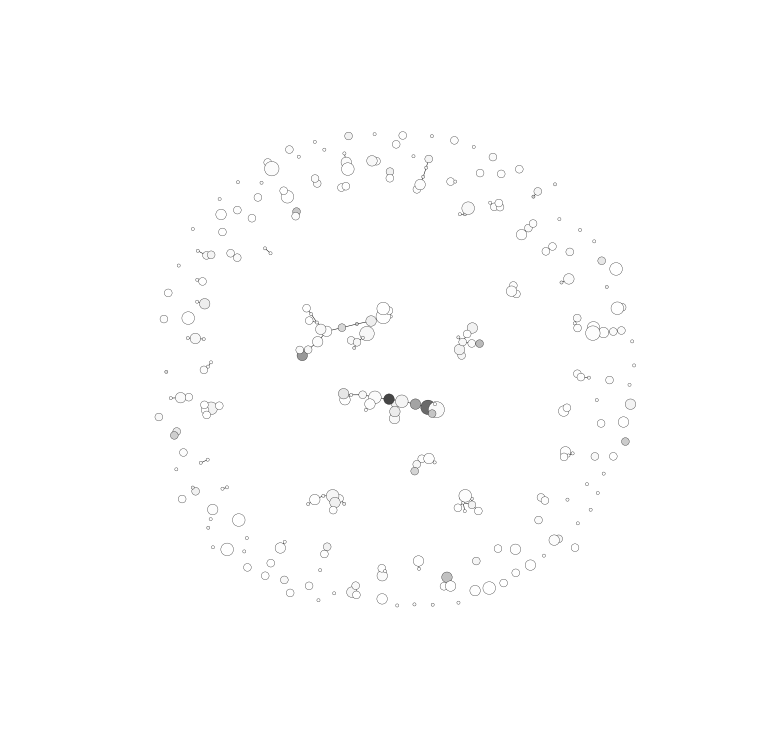

In [32]:
# Out of curiosity, let's see the network without forcing real geography:
plt.figure(figsize=(10,10))
P_non_geo = nx.spring_layout(RG)
nx.draw(RG, pos=P_non_geo, node_size=node_sizes, width=.5, node_color=node_colors)

# Really wish we had those missing edges/nodes!

## Part 3 - BONUS
Now that we have the network, it is useful to calculate some of it's properties to gain insights of the region.

First, we will obtain the node degrees, and create a histogram that shows the distribution of the degrees across the network nodes'.

**Deliverable**
* You should create a histogram showing the degree distribution across the network. The **x-axis** should have the different degrees, and the **y-axis** should have the number of observations.

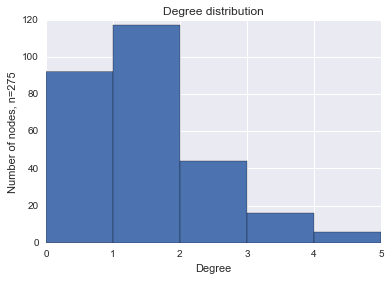

In [41]:
# Create your histogram here

D = degrees.values()
sns.set_style("darkgrid")
plt.figure()

plt.hist(D,5)
plt.xlabel('Degree')
plt.ylabel('Number of nodes, n=275')
plt.title('Degree distribution')

plt.show()



Finally, let's look at another useful network property: **centrality**. Centrality indicators help identify the most important vertices within a graph. With centrality algorithms, it is possible to identify key infrastructure nodes in urban networks.

We will be using 2 centrality measures: degree centrality and betweeness centrality. **Betweenness** is a centrality measure of a vertex within a graph. It quantifies the number of times a node acts as a bridge along the shortest path between two other nodes. Conceptually, edges that are more important to the functioning of the network will have a higher betweenness centrality. For `networkx`, the betweenness centrality of a node v is the sum of the fraction of all-pairs shortest paths that pass through v.

Historically first and conceptually simplest centrality measure is **degree centrality**, which is defined as the number of links incident upon a node (the number of ties that a node has). For `networkx`,  the degree centrality for a node v is the fraction of nodes it is connected to.

Using networkx's built-in function, calculate the **degree** and **betweenness** centrality of the network, and create 2 plots of the network, where either the color or the size of the node is dependent on both **centrality** measure. 

**Deliverable**
* You should create a plot of the network. The position of every node (`pos`) should be defined by the lat and lon of the given node. The **color** or **size** of the nodes should be dependent on the centrality measure corresponding to the plot (1 plot for degree, and one for betweenness). The other property not represented by the centrality should depend on another property of the network.

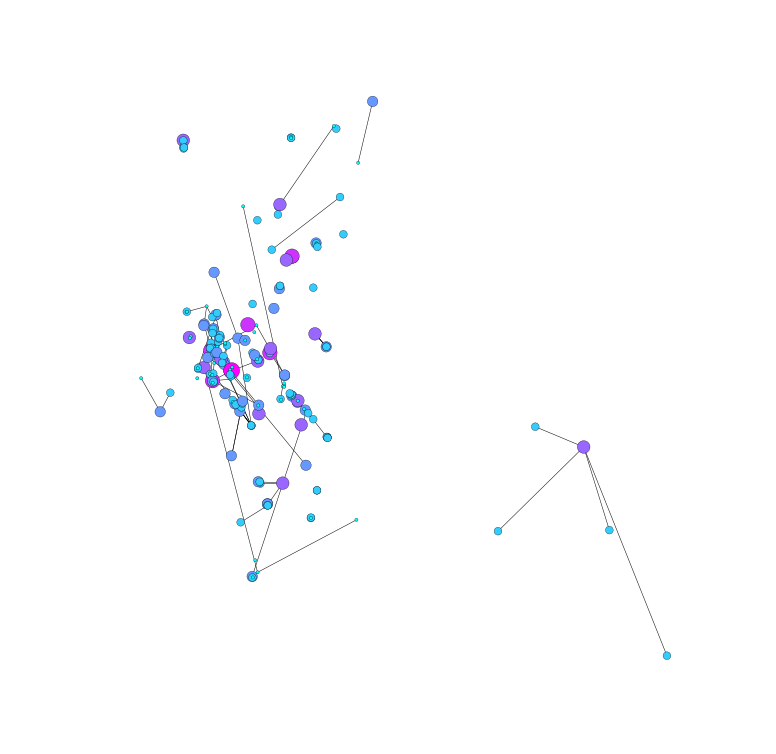

In [45]:
# Degree Centrality
degree_centrality_dict = nx.degree_centrality(RG)
degree_cent_color = list(degree_centrality_dict.values())

degrees = nx.degree(RG)
node_sizes = [(v * 50)+10 for v in degrees.values()]

my_cmap = plt.cm.get_cmap('cool')

plt.figure(figsize=(10,10))
nx.draw(RG, pos=P, node_size=node_sizes, width=.5, node_color=degree_cent_color, cmap=my_cmap)

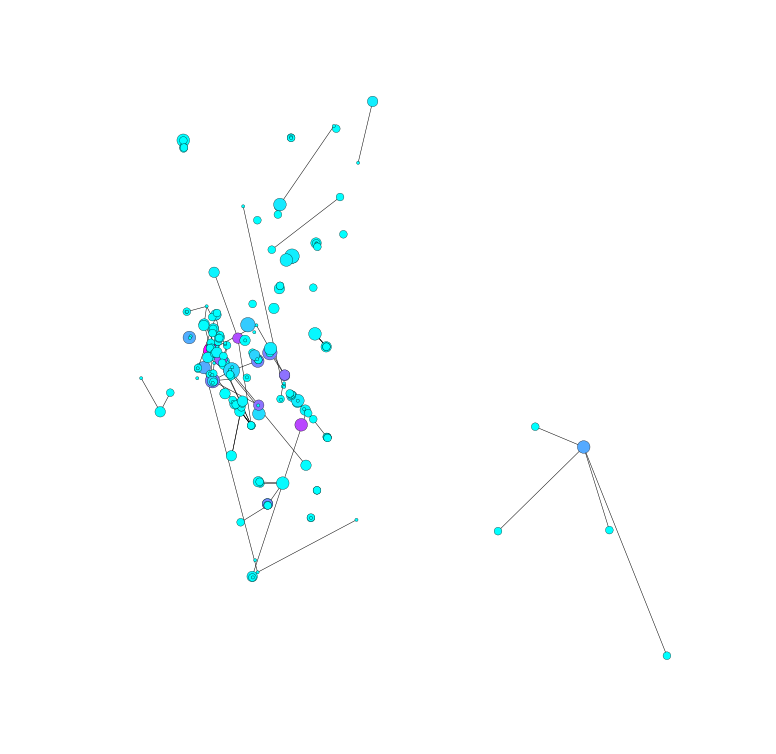

In [48]:
# Betweenness Centrality
between_centrality_dict = nx.betweenness_centrality(RG)
between_cent_color = list(between_centrality_dict.values())

degrees = nx.degree(RG)
node_sizes = [(v * 50)+10 for v in degrees.values()]

my_cmap = plt.cm.get_cmap('cool')

plt.figure(figsize=(10,10))
nx.draw(RG, pos=P, node_size=node_sizes, width=.5, node_color=between_cent_color, cmap=my_cmap)
